# Window size effect on local volume fraction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, widgets

# 2D
## Load a cleaned version of a micrograph

Image dimensions      : [865.0, 2798.0] [μm]
Global volume fraction: 0.39


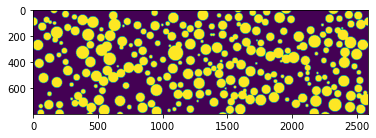

In [2]:
data = np.load('./micrograph.npz')
d2img = data['arr_0'][:800, :]

micro_to_voxel_scaling_factor_2d = 185 / 200

print(f'Image dimensions      : {[np.round(dim/micro_to_voxel_scaling_factor_2d) for dim in d2img.shape]} [\u03BCm]')
print(f'Global volume fraction: {d2img.sum()/d2img.size :.2f}')
plt.imshow(d2img)

## Choose window/box dimesnions to get information of the local volume fraction

In [3]:
def fun2d(x=100, y=100, hist=False, density=False):
    # convert micrometer to pixels
    x_int = int(round(x * micro_to_voxel_scaling_factor_2d))
    y_int = int(round(y * micro_to_voxel_scaling_factor_2d))
    # create a filter and convolute it with the original image
    volfilter = np.ones((x_int, y_int)) / (x_int * y_int)
    filteredimg = signal.fftconvolve(d2img, volfilter, mode='valid')
    # extract statistical information from the filtered image
    print(f'Mean     volume fraction using window of {x}x{y} [\u03BCm]: {np.mean(filteredimg):.2e}')
    print(f'Median   volume fraction using window of {x}x{y} [\u03BCm]: {np.median(filteredimg):.2e}')
    print(f'Variance volume fraction using window of {x}x{y} [\u03BCm]: {np.var(filteredimg):.2e}')
    print(f'Std      volume fraction using window of {x}x{y} [\u03BCm]: {np.std(filteredimg):.2e}')

    if hist:
        plt.xlabel('Local volume fraction [-]')
        plt.ylabel('Number fo windows [-]')
        plt.grid()
        plt.hist(filteredimg.flatten(), bins='auto', range=(0, 1), density=density)

xy_min = 1 / micro_to_voxel_scaling_factor_2d  # one pixel to micrometer
# use the smallest dimension to use 'valid' in fftconvolve
y_max = x_max = np.min([dim / micro_to_voxel_scaling_factor_2d for dim in d2img.shape])

x = widgets.IntSlider(description='x', min=xy_min, max=x_max, step=1, value=300)
y = widgets.IntSlider(description='y', min=xy_min, max=y_max, step=1, value=300)
hist = widgets.Checkbox(description='Show histogram', value=True, indent=True)
density = widgets.Checkbox(description='Density', value=False, indent=True)
# cumulative = widgets.Checkbox(description='Cumulative', value=True, indent=True)

out = widgets.interactive_output(fun2d, {'x': x, 'y': y, 'hist': hist, 'density': density})
widgets.HBox([widgets.VBox([x, y, hist, density]), out])

# 3D
## Load a cleaned version of a 3D CT scan

In [4]:
micro_to_voxel_scaling_factor_3d = 400 / 500
data = np.load('./ct_scan.npz')
d3img = data['d3img']

print(f'Image dimensions      : {[dim/micro_to_voxel_scaling_factor_3d for dim in d3img.shape]} [\u03BCm]')
print(f'Global volume fraction: {d3img.sum()/d3img.size :.2f}')

Image dimensions      : [625.0, 375.0, 375.0] [μm]
Global volume fraction: 0.39


## Choose window/box dimesnions to get information of the local volume fraction

In [5]:
def fun3d(x=100, y=100, z=100, hist=False, density=False):
    # convert micrometer to voxel
    x_int = int(round(x * micro_to_voxel_scaling_factor_3d))
    y_int = int(round(y * micro_to_voxel_scaling_factor_3d))
    z_int = int(round(z * micro_to_voxel_scaling_factor_3d))
    # create a filter and convolute it with the original image
    volfilter = np.ones((x_int, y_int, z_int)) / (x_int * y_int * z_int)
    filteredimg = signal.fftconvolve(d3img, volfilter, mode='valid')
    # extract statistical information from the filtered image
    print(f'Mean     volume fraction using window of {x}x{y}x{z} [\u03BCm]: {np.mean(filteredimg):.2e}')
    print(f'Median   volume fraction using window of {x}x{y}x{z} [\u03BCm]: {np.median(filteredimg):.2e}')
    print(f'Variance volume fraction using window of {x}x{y}x{z} [\u03BCm]: {np.var(filteredimg):.2e}')
    print(f'Std      volume fraction using window of {x}x{y}x{z} [\u03BCm]: {np.std(filteredimg):.2e}')

    if hist:
        plt.xlabel('Local volume fraction [-]')
        plt.ylabel('Number fo windows [-]')
        plt.grid()
        plt.hist(filteredimg.flatten(), bins='auto', range=(0, 1), density=density)

xyz_min = 1 / micro_to_voxel_scaling_factor_3d  # one voxel to micrometer
x_max, y_max, z_max = [dim / micro_to_voxel_scaling_factor_3d for dim in d3img.shape]

x = widgets.IntSlider(description='x', min=xyz_min, max=x_max, step=1, value=300)
y = widgets.IntSlider(description='y', min=xyz_min, max=y_max, step=1, value=300)
z = widgets.IntSlider(description='z', min=xyz_min, max=z_max, step=1, value=300)
hist = widgets.Checkbox(description='Show histogram', value=True, indent=True)
density = widgets.Checkbox(description='Density', value=False, indent=True)
# cumulative = widgets.Checkbox(description='Cumulative', value=True, indent=True)

out = widgets.interactive_output(fun3d, {'x': x, 'y': y, 'z': z, 'hist': hist, 'density': density})
widgets.HBox([widgets.VBox([x, y, z, hist, density]), out])